In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def P(x):
    #return (np.sin(x) + 0.5*np.sin(2*x) + 0.2*sin(5*x)+ 0.1*sin(9*x))
    return x

In [192]:
def auto_correlation(a,tau):  
    '''
    a --> must be a numpy array
        it is the list which we want to calculate its correlation
    tau --> the correlation will be computed up tp tau
    
    '''
    auto_corr = []
    shift_ = 1
    for i in range(tau):
        shift_+=1
        self_ = a[:-shift_]
        shift = a[shift_:]
        auto_corr.append((np.mean(self_*shift) - np.mean(self_)*np.mean(shift))/(np.std(self_)*np.std(shift)))
    return auto_corr

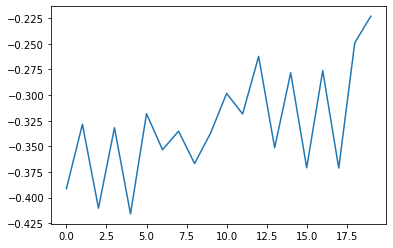

In [44]:
a = np.arange(1,100,1)**5
plt.plot(auto_correlation(np.array(a),20))

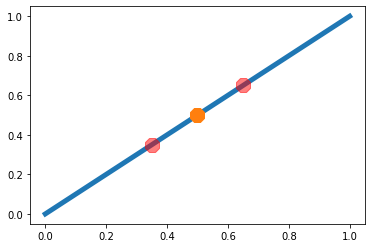

In [4]:
x = np.linspace(0,1,100)
y = P(x)
plt.plot(x,y,linewidth=5)
plt.plot([0.5],[0.5],'8',markersize=15)
plt.plot([0.65],[0.65],'8r',markersize=15,alpha=0.5)
plt.plot([0.35],[0.35],'8r',markersize=15,alpha=0.5)

In [5]:
#x = np.random.random()*3.14
x=0.5
i = x
rand = []
delta = 0.3
all_counter = 0
accept_counter= 0
rate = []

In [6]:
for iter_ in range(100000):
    all_counter+=1
    j = (i + (np.random.random()*2-1)*delta)%1
    #j = np.random.random()
    rand_ = np.random.random()
    if rand_< P(j)/P(i) :
        accept_counter+=1
        rand.append(j)
        i=j
    rate.append(accept_counter/all_counter)

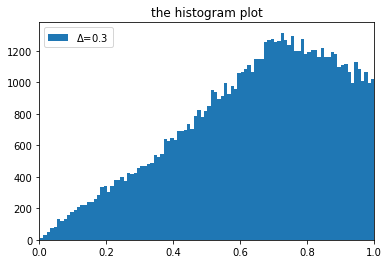

In [7]:
a,b,c = plt.hist(rand,bins=100,label = '$\Delta$={}'.format(delta))
plt.title('the histogram plot')
plt.xlim([0,1])
plt.legend()

Text(0.5, 1.0, 'acceptance rate')

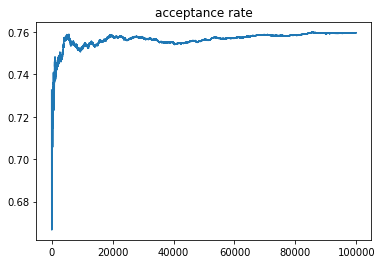

In [9]:
plt.plot(rate[100:])
plt.title('acceptance rate')

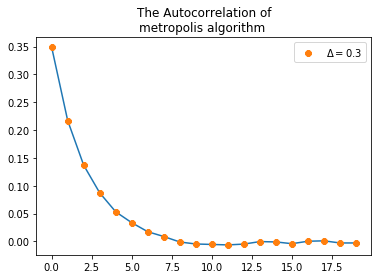

In [10]:
plt.plot(auto_correlation(np.array(rand),20))
plt.plot(auto_correlation(np.array(rand),20),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm ')
plt.legend()

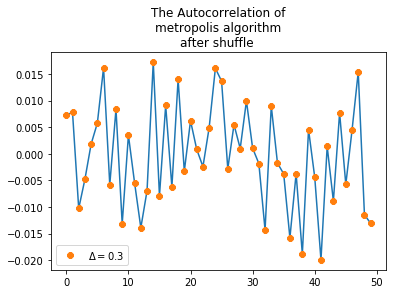

In [11]:
ind = np.random.randint(len(rand),size=10000)
rand_ = np.array(rand)[ind]
plt.plot(auto_correlation(np.array(rand_),50))
plt.plot(auto_correlation(np.array(rand_),50),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm\nafter shuffle ')
plt.legend()


## Guassian Random Generator

In [12]:
def P(x,sigma,mu):
    return (1/(2*np.pi)**0.5/sigma)*np.exp(-(x-mu)**2)/2/sigma**2

Text(0.5, 1.0, 'Guassian function')

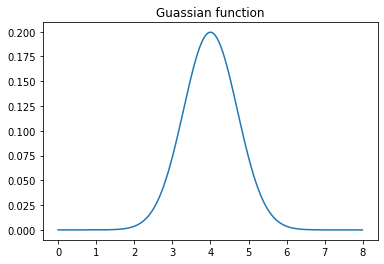

In [13]:
x = np.arange(0,8,0.01)
y = P(x,1,4)
plt.plot(x,y)
plt.title('Guassian function')

In [14]:
#x = np.random.random()*3.14
x=4
i = x
rand = []
delta = 7.3
all_counter = 0
accept_counter= 0
rate = []

In [15]:
for iter_ in range(100000):
    all_counter+=1
    j = (i + (np.random.random()*2-1)*delta)%8
    #j = np.random.random()
    rand_ = np.random.random()
    if rand_< np.abs(P(j,1,4)/P(i,1,4)) :
        accept_counter+=1
        rand.append(j)
        i=j
    rate.append(accept_counter/all_counter)

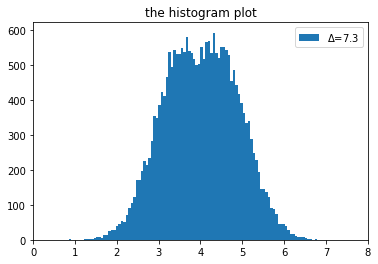

In [16]:
a,b,c = plt.hist(rand,bins=100,label = '$\Delta$={}'.format(delta))
plt.title('the histogram plot')
plt.xlim([0,8])
plt.legend()

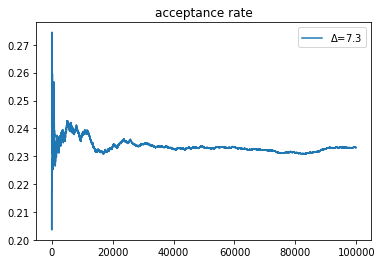

In [17]:
plt.plot(rate[100:],label = '$\Delta$={}'.format(delta))
plt.title('acceptance rate')
plt.legend()

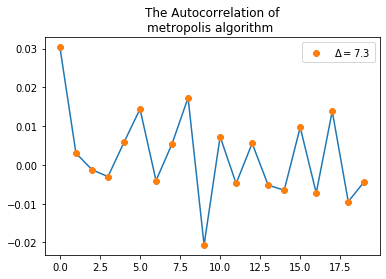

In [18]:
plt.plot(auto_correlation(np.array(rand),20))
plt.plot(auto_correlation(np.array(rand),20),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm ')
plt.legend()

# ISING MODEL


In [2]:
def lattice_gen(L):
    '''
    generates random lattice with size L*L
    the lattice will contain +1 -1 inside with random distribution
    '''
    lattice = np.random.random((L,L))
    lattice[lattice>0.5]=1
    lattice[lattice<0.5]=-1
    return lattice

In [253]:
def update(lattice_,beta,J):
    '''
    this function will update the lattice i.e. it will take one montecarlo step
    the number of updates will be l^3 in which the L is the lattice side size.
    note that the 'lattice' arg must be numpy array
    beta is 1/KT
    '''
    lattice = lattice_*1
    dE_list = [0]*18
    for i in [8,4,0,-4,-8]:
        dE_list[i]=np.exp(-J*i)
    L = lattice.shape[0]
    for scan in range(L*L**2):
        i,j=np.random.randint(L,size=2)
        #lattice[i,j]*=-1
        dE = 2*lattice[i,j]*(lattice[(i-1)%L,j]+lattice[(i+1)%L,j]+lattice[i,(j-1)%L]+lattice[i,(j+1)%L])
        rand = np.random.random()
        if rand < dE_list[int(dE)]:
            lattice[i,j]*=-1
    return lattice

In [233]:
def f(a):
    ap = a*1
    i,j = np.random.randint(4,size=2)
    ap[i,j] = 12+3
    return ap

Text(0.5, 1.0, 'lattice with random spins in it')

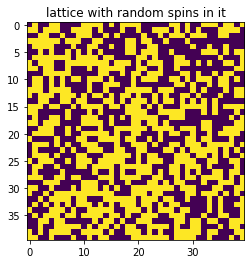

In [155]:
L = 40
J=1
beta =1
lattice = lattice_gen(L)
plt.imshow(lattice)
plt.title('lattice with random spins in it')

0.91125

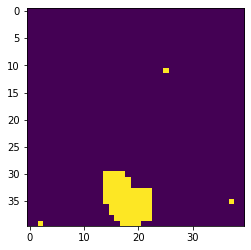

In [160]:
lattice = update(lattice,beta,J)
plt.imshow(lattice)
np.abs(lattice.mean())

## finding the attractor

In [254]:
L=100
J=1
beta = 1
mean_values = [[],[]]
m=0
for J in [0.55,1]:
    for k in range(20):
        mean = 0
        for i in range(20):
            lattice = lattice_gen(L)
            mean+=update(lattice,beta,J).sum()
        mean_values[m].append(np.abs(mean/20))
        print('{} ensmble is runngin'.format(k),end='')
    m+=1

KeyboardInterrupt: 

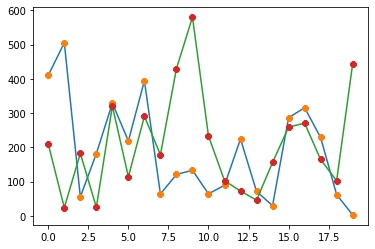

In [135]:
plt.plot(np.array(mean_values[0]))
plt.plot(np.array(mean_values[0]),'8',label = 'the M of lattice with J=0.55')
plt.plot(np.array(mean_values[1]))
plt.plot(np.array(mean_values[1]),'8',label = 'the M of lattice with J=1')
#plt.ylim([-0.2,0.2])
#plt.plot(mean_values,'8')

## Sampling the matrices and computing its autocorrelation


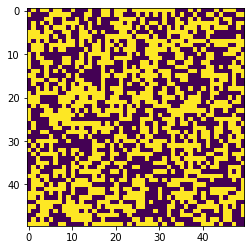

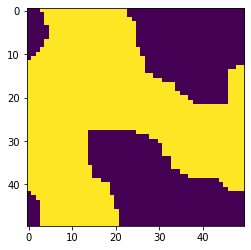

In [262]:
beta =1
J = 2
L=50
lattice = lattice_gen(L)
plt.imshow(lattice)
plt.figure()
plt.imshow(update(lattice,beta,J))

In [256]:
M = [[] for i in range(3)]
k=-1
for J in [0.1,0.8,3]:
    k+=1
    for i in range(100):
        lat = update(lattice,beta,J)
        M[k].append(np.abs(np.array(lat).mean()))

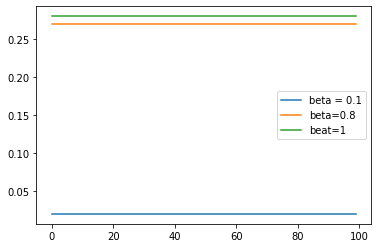

In [258]:
plt.plot([np.mean(M[0]) for i in range(len(M[1]))],label='beta = 0.1')
#plt.plot(M[0])
plt.plot([np.mean(M[1]) for i in range(len(M[1]))],label='beta=0.8')
#plt.plot(M[1])
plt.plot([np.mean(M[2]) for i in range(len(M[1]))],label='beat=1')
#plt.plot(M[2])
#plt.plot([np.mean(M[3]) for i in range(len(M[1]))],label='beat=2')
plt.legend()

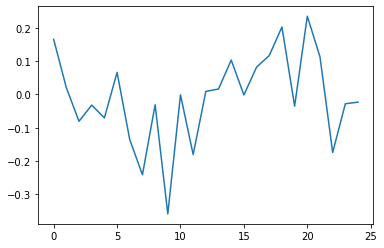

In [234]:
plt.plot(auto_correlation(np.array(M[1]),25))

In [ ]:
###############33

In [139]:
np.array(mean_values[0]).mean()

189.35500000000002

In [140]:
np.array(mean_values[1]).mean()

210.24

In [142]:
for j in [1,2]:
    print(j)

1
2


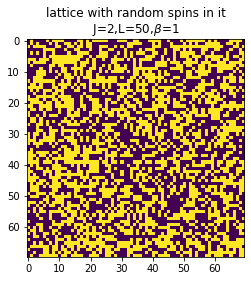

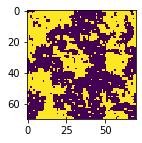

In [128]:
plt.imshow(looot)
plt.title('lattice with random spins in it\nJ={},L={},$\\beta$={}'.format(2,50,1))
plt.figure(figsize=(2,2))
lat = update(looot,1,0.45)
plt.imshow(lat)


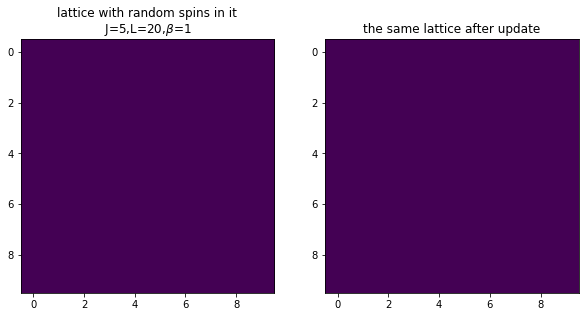

In [116]:
L = 20
J=5
beta=1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121,title=('lattice with random spins in it\nJ={},L={},$\\beta$={}'.format(J,L,beta)))
ax.imshow(latttice)
ax2 = fig.add_subplot(122,title=('the same lattice after update'))
lattice = update(latttice,beta,J)
ax2.imshow(lattice)


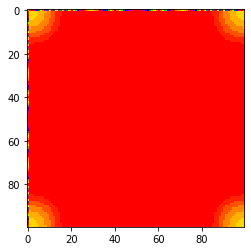

In [77]:
plt.imshow(np.abs(np.fft.fft2(lattice)),cmap='prism')
#plt.imshow(np.abs(np.fft.fft2(lattice)),cmap='viridis')

In [269]:
lattices_for_fixed_temp = []

In [256]:
for i in range(40):
    lattice = lattice_gen(30)
    lattice = update(lattice,1)
    lattices_for_fixed_temp.append(lattice)

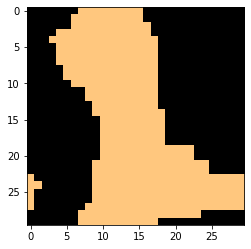

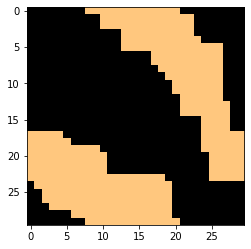

In [257]:
plt.imshow(lattices_for_fixed_temp[9])
plt.figure()
plt.imshow(lattices_for_fixed_temp[8])

In [107]:
# calculating the correlation if fixed (i,j) over different ansamples
single_value = []
i,j = 15,15
for k in range(len(lattices_for_fixed_temp)):
    single_value.append(lattices_for_fixed_temp[k][i,j])
    

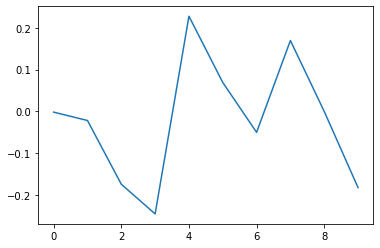

In [109]:
plt.plot(auto_correlation(np.array(single_value),10))

In [238]:
for kbt in KT_list:
    for scan in range(L**3):
        i,j=np.random.randint(L,size=2)
        #lattice[i,j]*=-1
        dE = 2*J*lattice[i,j]*(lattice[(i-1)%L,j]+lattice[(i+1)%L,j]+lattice[i,(j-1)%L]+lattice[i,(j+1)%L])
        rand = np.random.random()
        if rand < np.exp(-kbt*dE):
            lattice[i,j]*=-1

    M_list.append((1/kbt,lattice.sum()/L**2))

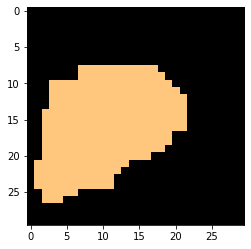

In [258]:
plt.imshow(lattice)

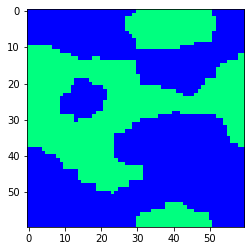

In [234]:
plt.imshow(lattice)

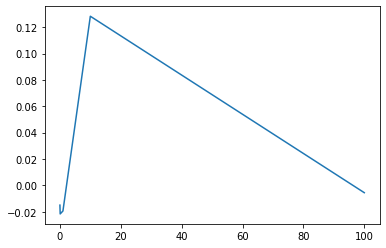

In [241]:
M_list = np.array(M_list)
plt.plot(M_list[:,0],M_list[:,1])

In [233]:
M_list

[(0.1, 0.6355555555555555),
 (0.2, 0.9072222222222223),
 (1.0, 1.0),
 (10.0, 0.034444444444444444),
 (1000.0, 0.005)]

In [64]:
i

519

In [65]:
j

199

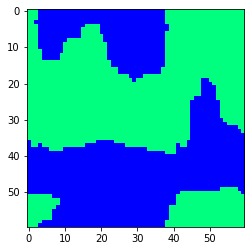

In [241]:
plt.imshow(lattice,cmap='winter')

In [5]:
plt.set_cmap('winter')


<Figure size 432x288 with 0 Axes>

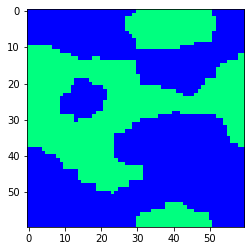

In [233]:
plt.imshow(lattice)

In [6]:
rand = np.random.random((10,10))

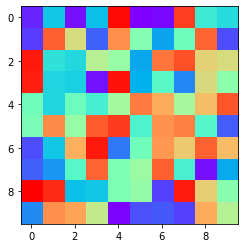

In [13]:
plt.imshow(rand,cmap='rainbow')

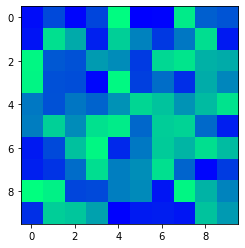

In [10]:
plt.imshow(rand)

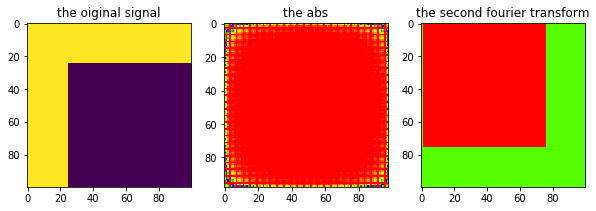

In [134]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(131,title='the oiginal signal')
ax.imshow(lattice)

ax2= fig.add_subplot(132,title='the abs')
ft = np.fft.fft2(lattice)
ax2.imshow(np.abs(ft[1:-1,1:-1]),cmap='prism')

ax3 =fig.add_subplot(133,title='the second fourier transform')
dft = np.fft.fft2(ft)
ax3.imshow(np.abs(dft),cmap='prism')




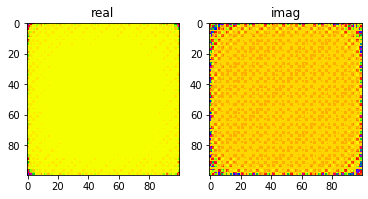

In [129]:
fig = plt.figure()
axx = fig.add_subplot(121,title='real')
axx.imshow(ft.real,cmap='prism')
axx2 = fig.add_subplot(122,title='imag')
axx2.imshow(ft.imag,cmap='prism')